# 1.导入tf.keras
tensorflow2推荐使用keras构建网络，常见的神经网络都包含在keras.layer中

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
print(tf.__version__)
print(tf.keras.__version__)

2.0.0-beta0
2.2.4-tf


# 2.构建简单模型
## 2.1 模型堆叠
最常见的模型类型是层的堆叠：tf.keras.Sequential模型

In [2]:
model = tf.keras.Sequential()

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

## 2.2 网络配置
tf.keras.layers 中网络配置：  

**activation**：设置层的激活函数。此参数由内置函数的名称指定，或指定为可调用对象。默认情况下，系统不会应用任何激活函数。

**kernel_initializer 和 bias_initializer**：创建层权重（核和偏差）的初始化方案。此参数是一个名称或可调用对象，默认为 "Glorot uniform" 初始化器。

**kernel_regularizer 和 bias_regularizer**：应用层权重（核和偏差）的正则化方案，例如 L1 或 L2 正则化。默认情况下，系统不会应用正则化函数

In [3]:
layers.Dense(32, activation='sigmoid')
layers.Dense(32, activation=tf.sigmoid)
layers.Dense(32, kernel_initializer='orthogonal')
layers.Dense(32, kernel_initializer=tf.keras.initializers.glorot_normal)
layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l2(0.01))
layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l1(0.01))

In [5]:
# 加载mnist数据集
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
# 构建模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
# 训练模型
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2929 - accuracy: 0.9150
Epoch 2/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1380 - accuracy: 0.9584
Epoch 3/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1036 - accuracy: 0.9682
Epoch 4/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0853 - accuracy: 0.9736
Epoch 5/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0699 - accuracy: 0.9787


In [9]:
# 评估模型
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.0686 - accuracy: 0.9779


[0.0685561811868567, 0.9779]

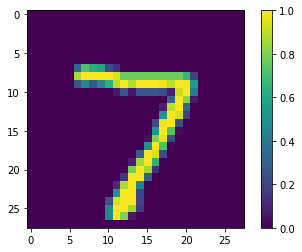

In [39]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)
plt.show();

In [32]:
res = model.predict(x_test)

In [34]:
import numpy as np
np.argmax(res[0])

7